In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
diab = pd.read_csv(r"C:\Users\muzam\OneDrive\Desktop\PROJECTS\healthcare-risk-modelling\data\diabetes.csv")
diab_df = pd.DataFrame(diab)
diab_df = diab_df.apply(pd.to_numeric)
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 2.1 identify missing values and column data types

In [3]:
# Columns with null/missing entries
diab_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diab_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

No missing values and all numeric columns

This means we do not need to separate categorical, numeric features into their respective categorical, numeric transformers because `int64` and `float64` are already in binary.

Hence, can also skip Imputation & OneHotEncoder

## 2.2 Model Training & Predictions

### i) Data preparation 

In [5]:
X = diab.drop("Outcome", axis=1)
y = diab["Outcome"]

### ii) Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### iii) Train model directly 
(No need for preprocessing or a Pipeline as dataset is already numeric and static)

In [7]:
model = RandomForestClassifier() # Because "Outcome" is discrete and counted, not measured
model.fit(X, y)

RandomForestClassifier()

### iv) Predictions

#### a) Predict Presence of Diabetes (class labels; 0 or 1) 

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

#### b) Predict probabilities (for more nuanced decisions)

In [9]:
y_proba = model.predict_proba(X_test)
y_proba

array([[0.87, 0.13],
       [0.19, 0.81],
       [0.24, 0.76],
       [0.3 , 0.7 ],
       [0.93, 0.07],
       [0.29, 0.71],
       [0.88, 0.12],
       [0.1 , 0.9 ],
       [0.06, 0.94],
       [0.77, 0.23],
       [0.78, 0.22],
       [0.11, 0.89],
       [0.1 , 0.9 ],
       [0.22, 0.78],
       [0.24, 0.76],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.26, 0.74],
       [0.13, 0.87],
       [0.1 , 0.9 ],
       [0.99, 0.01],
       [0.18, 0.82],
       [0.8 , 0.2 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       [0.13, 0.87],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.89, 0.11],
       [0.8 , 0.2 ],
       [0.91, 0.09],
       [0.83, 0.17],
       [0.08, 0.92],
       [0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.22, 0.78],
       [1.  , 0.  ],
       [0.87, 0.13],
       [0.27, 0.73],
       [0.22, 0.78],
       [0.98, 0.02],
       [0.93, 0.07],
       [0.99, 0.01],
       [0.94,

## 2.3 Evaluation of Model Performance

### Confusion Matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)

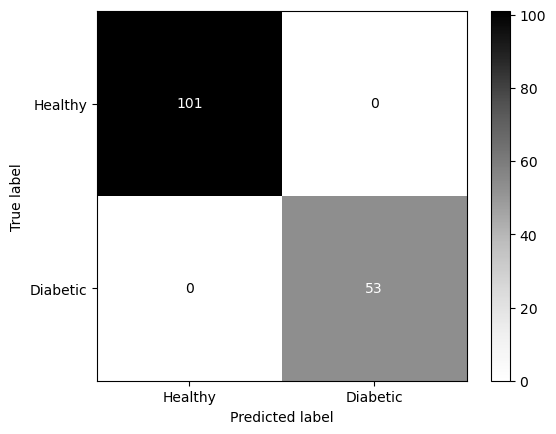

In [11]:
# visualisation
display = ConfusionMatrixDisplay(cm, display_labels=["Healthy", "Diabetic"])
display.plot(cmap=plt.cm.Greys, values_format="d");

### Classification Report

In [12]:
cr = classification_report(y_test, y_pred)

cr_dict = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetic"], output_dict=True)

cr_df = pd.DataFrame(cr_dict).transpose()

print(cr, "\n", cr_dict, "\n", cr_df)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        53

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154
 
 {'Healthy': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 101}, 'Diabetic': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 154}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 154}} 
               precision  recall  f1-score  support
Healthy             1.0     1.0       1.0    101.0
Diabetic            1.0     1.0       1.0     53.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    154.0
weighted avg        1.0     1.0       1.0    154.0


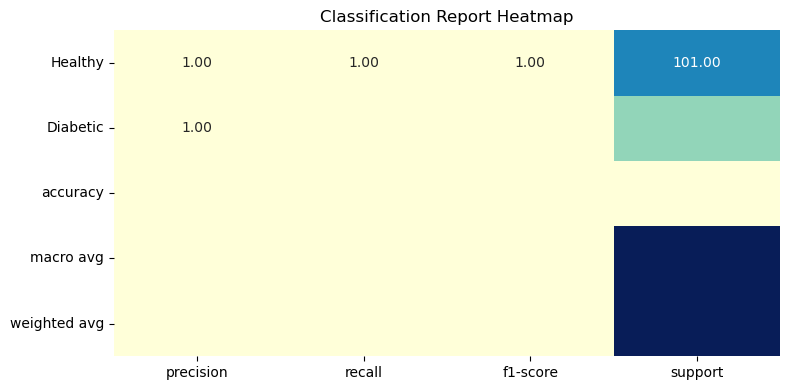

In [13]:
# Visualization
plt.figure(figsize=(8, 4))
sns.heatmap(cr_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Classification Report Heatmap")
plt.tight_layout() # PRevent overlap of colours
plt.show()

In [19]:
correlation = diab.corr(method="pearson")
var = np.var(diab)
var

C:\Users\muzam\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Pregnancies                    11.339272
Glucose                      1020.917262
BloodPressure                 374.159449
SkinThickness                 254.141900
Insulin                     13263.886875
BMI                            62.079046
DiabetesPedigreeFunction        0.109636
Age                           138.122964
Outcome                         0.227186
dtype: float64

Let's remove DiabetesPedigreeFunction due to very negligible variance (nearly 0)

### Why?
 #### No predictive power:
* Cannot help model distinguish between classes or predict values.
 #### Noisy & Complex:
* Increases the dimensionality without improving model, harming performance.
 #### Slows computation:
* More features increase computation power required (burden) & memory usage
 #### Interfere with certain algorithms:
* Algos involving matrix inversion or distance metrics can be numerically unstable or less efficient in dealing with redundant/constant features
 #### Affects feature scaling:
* Scaling features like Standardization fail if std. dev is 0 (due to var 0)